# 과제 1 : OR 게이트 학습 및 시각화 (ANN)

In [16]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

In [17]:
X = torch.tensor([[0,0],[0,1],[1,0],[1,1]], dtype=torch.float32)
y = torch.tensor([[0],[1],[1],[1]], dtype=torch.float32)

In [18]:
class OR_ANN(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = nn.Sequential(
            nn.Linear(2, 2),
            nn.Sigmoid(),       
            nn.Linear(2, 1),
            nn.Sigmoid()       
        )
    
    def forward(self, x):
        return self.layer(x)

model_OR = OR_ANN()

In [19]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model_OR.parameters(), lr=0.1)

입력값:
 tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])
예측값:
 tensor([[0.],
        [1.],
        [1.],
        [1.]])


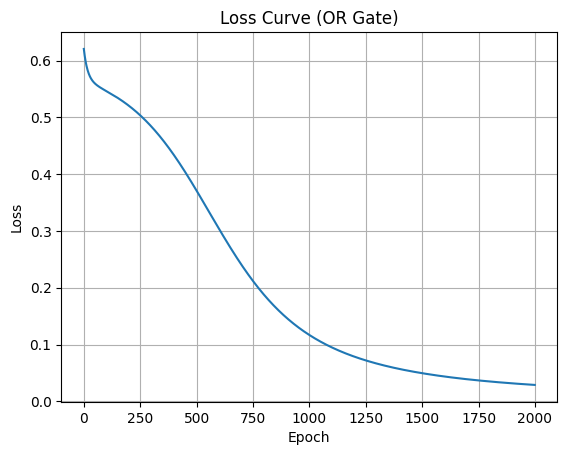

In [20]:
losses = []
for epoch in range(2000):
    optimizer.zero_grad()
    output = model_OR(X)
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

with torch.no_grad():
    print("입력값:\n", X)
    print("예측값:\n", model_OR(X).round())

plt.plot(losses)
plt.title("Loss Curve (OR Gate)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()
plt.show()


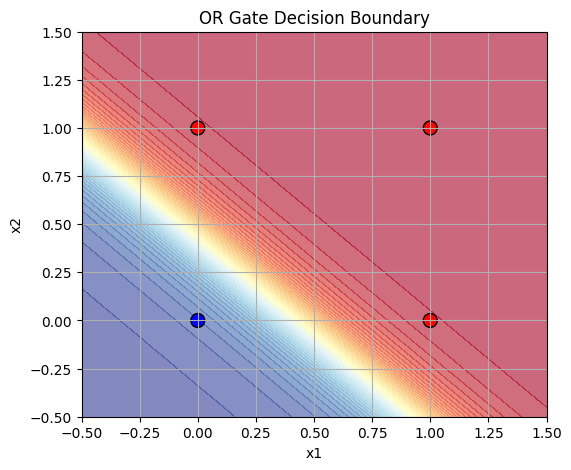

In [ ]:
def plot_decision_boundary(model, X, y):
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    
    grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)

    with torch.no_grad():
        probs = model(grid).reshape(xx.shape).numpy()

    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, probs, levels=50, cmap='RdYlBu_r', alpha=0.6) 
    plt.scatter(X[:, 0], X[:, 1], c=y[:, 0], cmap='bwr', edgecolors='k', s=100)
    plt.title("OR Gate Decision Boundary")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.grid(True)
    plt.show()
    
plot_decision_boundary(model_OR, X, y)

은닉층 1개를 가진 인공신경망(ANN)을 사용하여 OR 게이트를 학습하였다. 입력값은 (x1, x2)이고, 출력값은 OR 연산 결과인 [0, 1, 1, 1]이다. 모델은 Binary Cross Entropy 손실 함수를 기준으로 학습되었으며, 2000 epoch 동안의 학습 과정에서 loss가 지속적으로 감소하여 안정적으로 수렴하였다. 시각화된 decision boundary 결과를 통해, OR 게이트가 선형 분리 가능한 문제임을 확인할 수 있었으며, 단층 ANN만으로도 효과적으로 분류가 가능함을 알 수 있다.

# 과제 2 : XOR 게이트 학습 시도 및 한계 시각화 (ANN)

In [27]:

X = torch.tensor([[0,0],[0,1],[1,0],[1,1]], dtype=torch.float32)
y = torch.tensor([[0],[1],[1],[0]], dtype=torch.float32)  # XOR


In [32]:
class XOR_ANN(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = nn.Sequential(
            nn.Linear(2, 2),
            nn.Sigmoid(),
            nn.Linear(2, 1),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        return self.layer(x)

model_XOR_ANN = XOR_ANN()

In [33]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model_XOR_ANN.parameters(), lr=0.1)

입력값:
 tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])
예측값:
 tensor([[0.],
        [1.],
        [0.],
        [0.]])


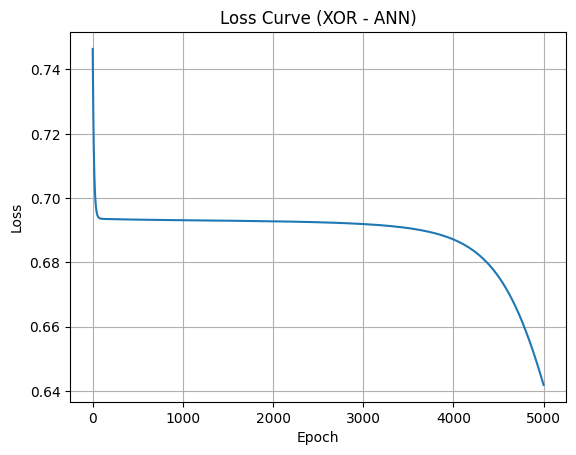

In [34]:
losses = []
for epoch in range(5000):
    optimizer.zero_grad()
    output = model_XOR_ANN(X)
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

with torch.no_grad():
    pred = model_XOR_ANN(X)
    print("입력값:\n", X)
    print("예측값:\n", pred.round())

plt.plot(losses)
plt.title("Loss Curve (XOR - ANN)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()
plt.show()


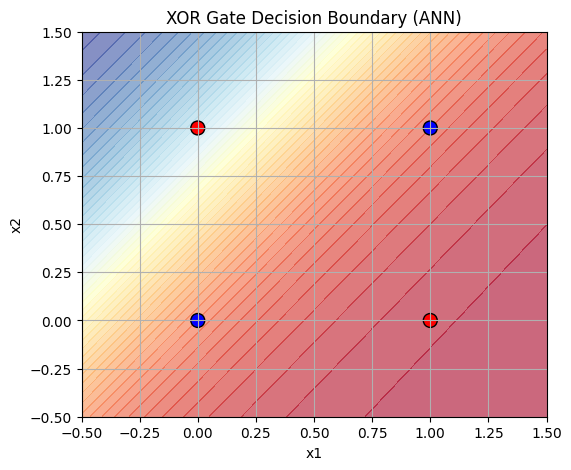

In [47]:
def plot_decision_boundary(model_XOR_ANN, X, y):
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))

    grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)

    with torch.no_grad():
        probs = model_XOR_ANN(grid).reshape(xx.shape).numpy()

    probs = 1 - probs

    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, probs, levels=50, cmap='RdYlBu_r', alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y[:, 0], cmap='bwr', edgecolors='k', s=100)
    plt.title("XOR Gate Decision Boundary (ANN)")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.grid(True)
    plt.show()

plot_decision_boundary(model_XOR_ANN, X, y)

XOR 게이트는 "두 입력이 다를 때 1, 같을 때 0"을 출력하는 비선형 분리 문제이다. 본 실험에서는 은닉층 1개를 갖는 단층 인공신경망(ANN)을 통해 XOR 문제를 학습하려 시도하였다.

하지만 학습 결과 예측값은 정답과 정확히 일치하지 않았고, Loss 값 또한 수렴하지 않았다. Decision boundary 시각화를 통해 확인한 결과, 두 클래스(0과 1)가 하나의 직선으로는 명확히 나눠지지 않음을 알 수 있었다.

이는 단층 신경망의 표현력이 선형 경계에 제한되어 있기 때문이며, XOR과 같은 비선형 문제를 해결하기 위해서는 더 깊은 신경망(DNN)이 필요하다.

# 과제 3 : XOR 게이트 학습 및 시각화 (DNN)

In [40]:
X = torch.tensor([[0,0],[0,1],[1,0],[1,1]], dtype=torch.float32)
y = torch.tensor([[0],[1],[1],[0]], dtype=torch.float32)

예측값: [0 1 1 0]


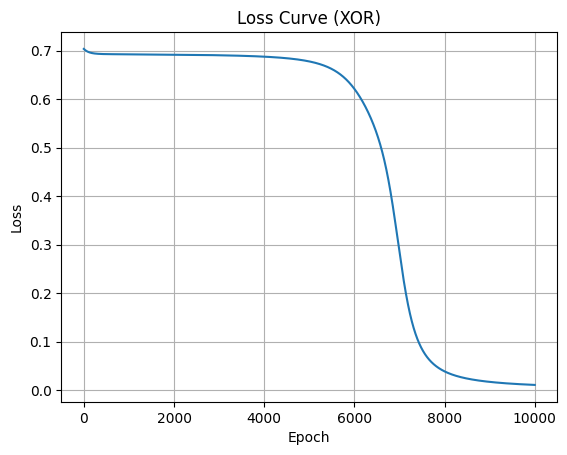

In [48]:
model_XOR_DNN = nn.Sequential(
    nn.Linear(2, 8),
    nn.Tanh(),
    nn.Linear(8, 6),
    nn.Tanh(),
    nn.Linear(6, 4),
    nn.Tanh(),
    nn.Linear(4, 1),
    nn.Sigmoid()
)


criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model_XOR_DNN.parameters(), lr=0.01)

losses = []
for epoch in range(10000):
    optimizer.zero_grad()
    output = model_XOR_DNN(X)
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

with torch.no_grad():
    output = model_XOR_DNN(X)
    preds = (output.numpy() > 0.5).astype(int)
    print("예측값:", preds.flatten())

plt.plot(losses)
plt.title("Loss Curve (XOR)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


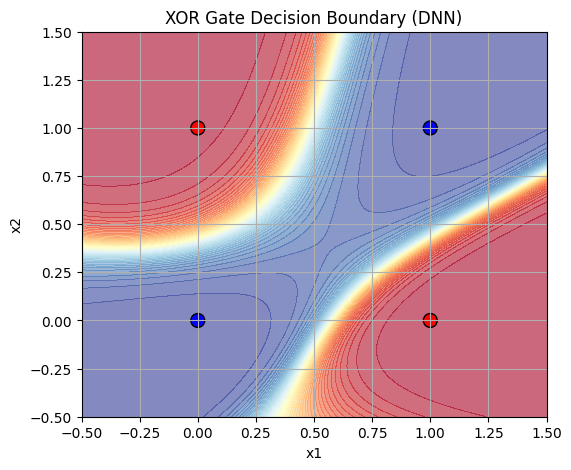

In [51]:
def plot_decision_boundary(model, X, y):
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    
    grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)

    with torch.no_grad():
        probs = model(grid).reshape(xx.shape).numpy()

    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, probs, levels=50, cmap='RdYlBu_r', alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y[:, 0], cmap='bwr', edgecolors='k', s=100)
    plt.title("XOR Gate Decision Boundary (DNN)")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.grid(True)
    plt.show()

plot_decision_boundary(model_XOR_DNN, X, y)

XOR 게이트는 "두 입력이 다를 때 1, 같을 때 0"을 출력하는 비선형 분리 문제이다. 은닉층 2개를 갖는 심층 신경망(DNN)을 통해 XOR 문제를 학습하였다.

학습 결과, 모델은 4개의 입력 조합에 대해 정답과 완전히 일치하는 예측값을 출력하였고, Loss 값도 안정적으로 0에 수렴하였다. Decision boundary 시각화를 통해 확인한 결과, 결정 경계가 곡선 형태로 형성되며 0과 1의 클래스가 올바르게 분리된 것을 확인할 수 있었다.

이는 XOR과 같은 비선형 문제를 해결하기 위해선 단층 신경망(ANN)보다 더 복잡한 표현력을 지닌 DNN이 필요함을 보여준다. 본 실험을 통해 은닉층의 깊이와 비선형 활성화 함수가 신경망의 학습 능력에 중요한 역할을 한다는 점을 확인할 수 있었다.